In [1]:
#Henry Zinn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv('titanic.csv', delimiter = ',')
data.head(5)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])
data = data[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
data['Sex'].replace({'male':1, 'female':0}, inplace=True)
data.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [4]:
data.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

[Text(0, 0, 'Perished'), Text(1, 0, 'Survived')]

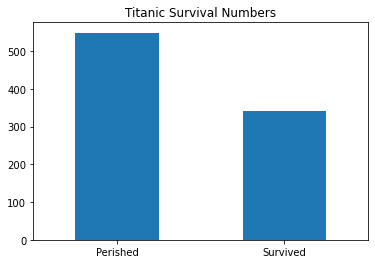

In [5]:
bargraph= data['Survived'].value_counts().plot(kind= 'bar')
bargraph.set_title('Titanic Survival Numbers')
bargraph.set_xticklabels(['Perished', 'Survived'], rotation = 0)

In [6]:
data.mean()

Pclass       2.308642
Sex          0.647587
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
Survived     0.383838
dtype: float64

In [7]:
data.groupby(data['Survived']).mean()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


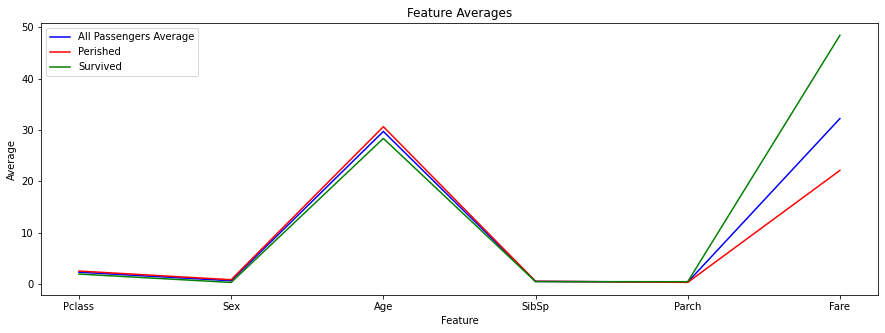

In [8]:
survived = data.groupby(['Survived']).get_group(1).mean()
perished = data.groupby(['Survived']).get_group(0).mean()
total = data.mean()
samples = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(15,5))
plt.plot(samples, total[samples], 'b', label = 'All Passengers Average')
plt.plot(samples, perished[samples], 'r', label = 'Perished')
plt.plot(samples, survived[samples], 'g', label = 'Survived')
plt.title("Feature Averages")
plt.xlabel("Feature")
plt.ylabel("Average")
plt.legend()

Text(0.5, 0.98, 'Feature Averages - A Closer Look')

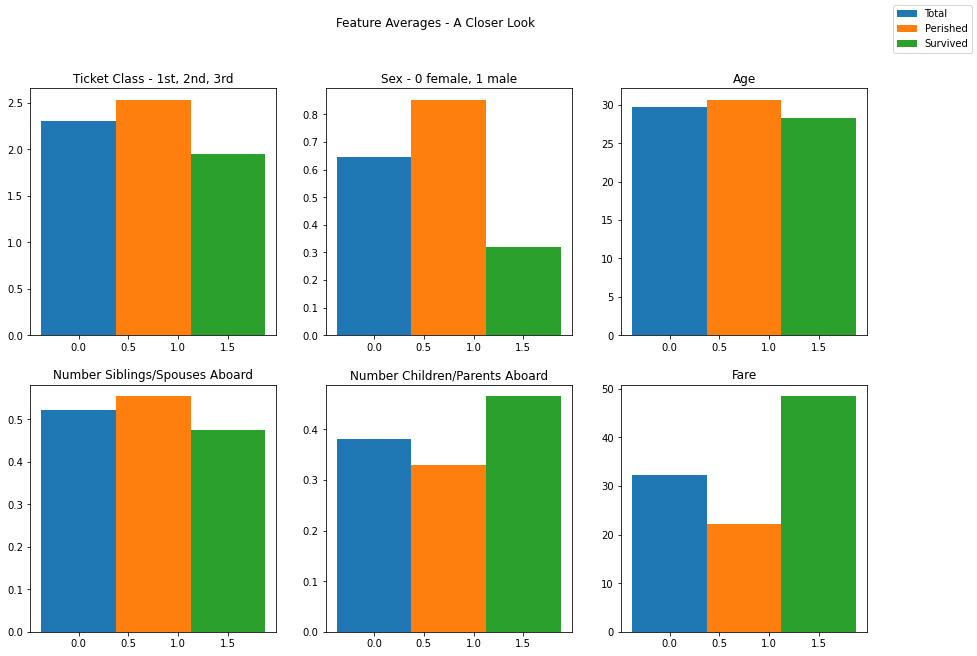

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
width = .75
ax[0,0].bar(0,total['Pclass'], width, label = 'Total')
ax[0,0].bar(width,perished['Pclass'], width, label = 'Perished')
ax[0,0].bar(width*2, survived['Pclass'], width, label = 'Survived')
ax[0,0].set_title('Ticket Class - 1st, 2nd, 3rd')

ax[0,1].bar(0, total['Sex'], width)
ax[0,1].bar(width,  perished['Sex'], width)
ax[0,1].bar(width*2, survived['Sex'], width)
ax[0,1].set_title('Sex - 0 female, 1 male')

ax[0,2].bar(0, total['Age'], width)
ax[0,2].bar(width,  perished['Age'], width)
ax[0,2].bar(width*2, survived['Age'], width)
ax[0,2].set_title('Age')

ax[1,0].bar(0, total['SibSp'], width)
ax[1,0].bar(width,  perished['SibSp'], width)
ax[1,0].bar(width*2, survived['SibSp'], width)
ax[1,0].set_title('Number Siblings/Spouses Aboard')

ax[1,1].bar(0, total['Parch'], width)
ax[1,1].bar(width,  perished['Parch'], width)
ax[1,1].bar(width*2, survived['Parch'], width)
ax[1,1].set_title('Number Children/Parents Aboard')

ax[1,2].bar(0, total['Fare'], width)
ax[1,2].bar(width,  perished['Fare'], width)
ax[1,2].bar(width*2, survived['Fare'], width)
ax[1,2].set_title('Fare')

fig.legend()
fig.suptitle("Feature Averages - A Closer Look")

In [10]:
data.corrwith(data['Survived'])

Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
dtype: float64

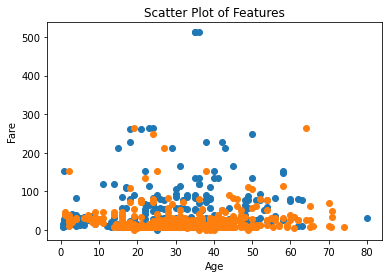

In [11]:
survived = data.groupby(['Survived']).get_group(1)
perished = data.groupby(['Survived']).get_group(0)
plt.scatter(survived['Age'],survived['Fare'])
plt.scatter(perished['Age'],perished['Fare'])
plt.title("Scatter Plot of Features")
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()